# Quantum Teleportation Lab

This Jupyter Notebook demonstrates the principles of quantum teleportation, a technique for transferring an unknown quantum state from one qubit to another without physically moving the qubit itself. We will use Qiskit to simulate this process.

## 1. Setting up the Environment

First, we import the necessary libraries from Qiskit and NumPy. Execute the code cell below to import these libraries.

In [122]:
import numpy as np
from numpy import pi, random
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.circuit.library import UGate

## 2. Creating the Quantum Circuit

We initialize a quantum circuit with three qubits and three classical bits.

*   **q0:** Alice's qubit (the qubit whose state will be teleported).
*   **q1:** Entangled qubit 1 (shared between Alice and Bob).
*   **q2:** Bob's qubit (the target qubit where the state will be teleported to).
*   **c0, c1, c2:** Classical bits to store measurement results.

Execute the code cell below to create the quantum circuit.

In [123]:
# Creating Quantum Circuit with 3 qubits and 3 classical bits
qr = QuantumRegister(3, 'q')  # q0: Alice's qubit (to teleport), q1: Entangled qubit 1, q2: Bob's qubit (target)
cr = ClassicalRegister(3, 'c')
qc = QuantumCircuit(qr, cr)

## 3. Preparing the Quantum State to be Teleported

We will create a random quantum state to be teleported. This state is *unknown* to Bob (and even Alice, in the sense that it's randomly generated each time).  We use a general single-qubit unitary gate (UGate) to create this random state and apply it to Alice's qubit (q0).

Execute the code cell to create and apply the random quantum state. You will also see the LaTeX representation of the random unitary gate applied.

In [124]:
# Preparing the Quantum State to be Teleported - Unknown State (Random)
random_gate = UGate( # Using UGate for general single-qubit state
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi
)
display(array_to_latex(random_gate.to_matrix(), prefix="U = ")) # Display LaTeX of random unitary

qc.append(random_gate, [qr[0]]) # Apply random unitary to q0 (Alice's qubit)
qc.barrier() # Visual barrier for circuit diagram clarity

<IPython.core.display.Latex object>

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

## 4. Creating the Entangled Pair (Bell State)

Entanglement is the crucial quantum resource for teleportation. We create a maximally entangled Bell state (|Φ⁺⟩) between qubit q1 (with Alice) and qubit q2 (with Bob). This entangled pair is created *before* Alice knows the state to be teleported.

Execute the code cell to create the entangled Bell pair in the circuit.

In [125]:
# Creating the Entangled Pair (Bell State - Phi+) - Entanglement Resource!
qc.h(qr[1])      # Hadamard gate on q1
qc.cx(qr[1], qr[2])  # CNOT gate entangling q1 and q2
qc.barrier() # Visual barrier

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

## 5. Bell Measurement

Alice performs a Bell measurement on her qubit (q0, carrying the unknown state) and her half of the entangled pair (q1). This measurement projects the qubits into one of the four Bell states and extracts classical information about the unknown state.

Execute the code cell to add the Bell measurement to the circuit.

In [126]:
# Bell Measurement by Alice
qc.cx(qr[0], qr[1])  # CNOT between q0 and q1
qc.h(qr[0])       # Hadamard on q0
qc.barrier() # Visual barrier

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

## 6. Measurement and Classical Communication

Alice measures her qubits (q0 and q1) in the computational basis. The measurement outcomes (classical bits c0 and c1) represent the classical information that needs to be communicated to Bob. In a real teleportation experiment, Alice would send these classical bits to Bob via a classical channel (like the internet or phone). In our simulation, this communication is handled implicitly within Qiskit.

Execute the code cell to add the measurements for classical communication.

In [127]:
# Measurement and Classical Communication (Simulated within circuit)
qc.measure([qr[0], qr[1]], [cr[0], cr[1]]) # Measure q0 and q1, store in c0 and c1
qc.barrier() # Visual barrier

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

## 7. Transformation on Bob's Qubit (Bob's Correction)

Based on the classical information (c0 and c1) received from Alice (simulated by the measurement outcomes), Bob applies specific quantum gates to his qubit (q2) to reconstruct the teleported state. These gates are conditional, meaning they are applied *only if* the corresponding classical bit is 1.

Execute the code cell to add the conditional gates for Bob's correction.

In [128]:
# Conditional Transformation on Bob's Qubit (Bob's Correction)
qc.x(qr[2]).c_if(cr[1], 1) # Apply X gate to q2 if c1 (Alice's 2nd measurement) is 1
qc.z(qr[2]).c_if(cr[0], 1) # Apply Z gate to q2 if c0 (Alice's 1st measurement) is 1
qc.barrier() # Visual barrier

C:\Users\izzye\AppData\Local\Temp\ipykernel_11468\2067590571.py:2: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.x(qr[2]).c_if(cr[1], 1) # Apply X gate to q2 if c1 (Alice's 2nd measurement) is 1
C:\Users\izzye\AppData\Local\Temp\ipykernel_11468\2067590571.py:3: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.z(qr[2]).c_if(cr[0], 1) # Apply Z gate to q2 if c0 (Alice's 1st measurement) is 1


CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

## 8. Recovering the Original State (Verification)

To verify that teleportation has worked, we apply the *inverse* of the initial random unitary gate (UGate) to Bob's qubit (q2). If teleportation is successful, applying this inverse gate should ideally return Bob's qubit (q2) to the |0> state (or a state close to |0>, given the probabilistic nature of quantum mechanics and simulations).

Execute the code cell to add the inverse UGate for verification and a final barrier.

In [129]:
# Recovering the Original State (Inverse of Random Gate - for Verification)
qc.append(random_gate.inverse(), [qr[2]]) # Apply inverse UGate to q2
qc.barrier() # Visual barrier

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

## 9. Measurement and Verification - Bob's Final Measurement

Finally, Bob measures his qubit (q2) in the computational basis. If teleportation was successful, we expect the measurement outcome of q2 (stored in classical bit c2) to be consistent with the initial state of q0 (before teleportation).  Ideally, if we targeted teleporting a state close to |0>, we expect to see counts mostly for classical bit c2 being 0. Due to the random initial state and simulation, we will examine the histogram of counts to analyze the outcome.

Execute the code cell to add the final measurement and visualize the circuit diagram. The circuit diagram will be displayed below the code cell.

--- Quantum Teleportation Circuit Diagram ---


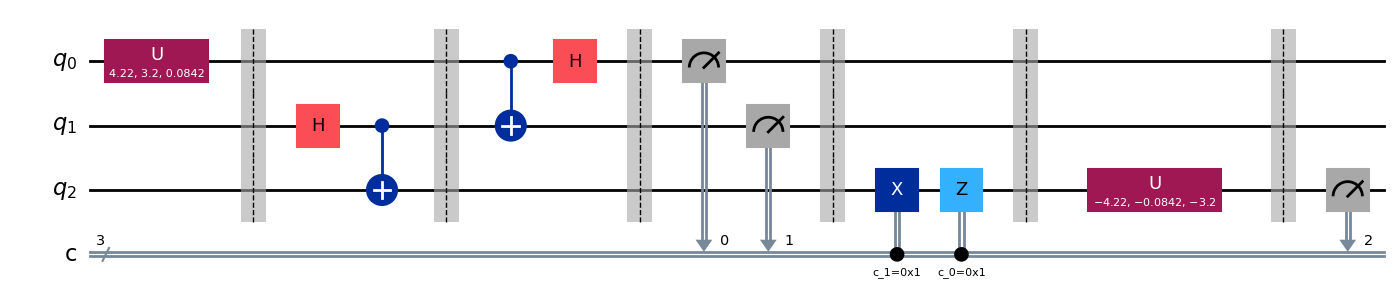

In [130]:
# Measurement and Verification - Bob's Final Measurement
qc.measure(qr[2], cr[2]) # Measure q2 (Bob's qubit) and store in c2

# Circuit Visualization
print("--- Quantum Teleportation Circuit Diagram ---")
display(qc.draw(output='mpl')) # Display circuit diagram

## 10. Circuit Simulation and Results

Now, we simulate the quantum circuit using Qiskit's AerSimulator. We run the simulation for 1024 shots to get statistically meaningful results. After simulation, we plot a histogram of the measurement outcomes to visualize the results.

Execute the code cell to run the simulation and display the histogram of measurement outcomes. The histogram will appear below the code cell.

In [131]:
# Circuit Visualization and Simulation
simulator = AerSimulator()
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts(qc)

print("--- Measurement Outcome Histogram ---")
plot_histogram(counts)
plt.show() # Show histogram plot

outputstate = '000' # We expect c2 to be 0 if teleportation worked and inverse gate returned q2 to |0>
if outputstate in counts:
    fidelity_output_0 = counts[outputstate]/1024 # Rough fidelity if focusing on |0> output
    print(f"\nApproximate Fidelity to |0> state (based on c2=0 counts): {fidelity_output_0:.4f}")
else:
    print("\nNo counts for output state '000'. Fidelity cannot be roughly estimated with this outputstate.")

--- Measurement Outcome Histogram ---

Approximate Fidelity to |0> state (based on c2=0 counts): 0.2520


## 11. Analyzing the Results

Examine the histogram of measurement outcomes. Focus on the counts for the classical bit `c2` (the rightmost bit in the histogram labels, representing the measurement outcome of Bob's qubit q2).

*   **If teleportation is successful:** You should observe a high probability for outcomes where `c2` is '0' (or '0' as the rightmost bit in the output string, e.g., '000', '010', '100', '110'). This indicates that Bob's qubit (q2) is, after the teleportation and inverse gate operations, primarily in the |0> state, which is what we expect if the teleportation and inverse operations worked correctly.
*   **Examine the fidelity:** The approximate fidelity printed below the histogram gives a rough measure of how close the teleported state is to the expected |0> state (based on counts where c2=0). Higher fidelity values (closer to 1) indicate better teleportation performance in this simplified verification.

**Congratulations!** You have simulated quantum teleportation using Qiskit. This lab demonstrates the key principles of teleportation: entanglement as a resource, Bell measurement, classical communication, and quantum state reconstruction.

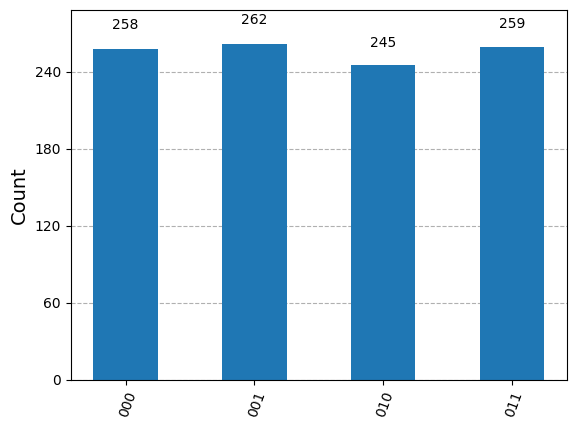

In [132]:
plot_histogram(counts)

# Superdense Coding Lab

This Jupyter Notebook demonstrates Superdense Coding, a quantum communication protocol that allows two classical bits of information to be transmitted from Alice to Bob by sending only *one qubit*. We will use Qiskit to simulate this process.

## 1. Creating the Quantum Circuit

We initialize a quantum circuit with two qubits and two classical bits.

*   **q0:** Alice's qubit (used to encode and send classical bits).
*   **q1:** Bob's qubit (used to receive and decode classical bits).
*   **c0, c1:** Classical bits to store measurement results.

Execute the code cell below to create the quantum circuit.

In [133]:
import numpy as np
from numpy import pi, random
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Creating Quantum Circuit with 2 qubits and 2 classical bits
qr = QuantumRegister(2, 'q')  # q0: Alice's qubit, q1: Bob's qubit
cr = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qr, cr)

## 2. Creating the Entangled Pair (Bell State)

Superdense coding relies on pre-shared entanglement between Alice and Bob. We create a maximally entangled Bell state (|Φ⁺⟩) between Alice's qubit (q0) and Bob's qubit (q1). This entangled pair serves as the quantum resource for superdense coding.

Execute the code cell below to create the entangled Bell pair in the circuit.

In [134]:
# Creating Entangled Pair (Bell State - Phi+) - Entanglement Resource!
qc.h(qr[0])      # Hadamard gate on q0 (Alice's qubit)
qc.cx(qr[0], qr[1])  # CNOT gate entangling q0 and q1 (Alice and Bob's qubits)
qc.barrier() # Visual barrier for circuit diagram clarity

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)), clbits=())

## 3. Encoding Classical Information (Alice's Operations)

Alice wants to send two classical bits to Bob. Let's define these bits as `bit1` and `bit2`.  Based on the values of `bit1` and `bit2`, Alice applies specific quantum gates to *her* qubit (q0) to encode the classical information into the entangled state.

In this example, we will encode `bit1 = 0` and `bit2 = 1`. You can change these values to encode different classical bit pairs.

*   **bit2 is encoded using the X gate:** If `bit2 = 1`, apply an X gate to q0.
*   **bit1 is encoded using the Z gate:** If `bit1 = 1`, apply a Z gate to q0.

Execute the code cell below to set the encoded bits and apply the corresponding encoding gates to Alice's qubit.

In [135]:
# Encoding Classical Information (Alice's operations) - Based on bit1 and bit2
bit1 = 0  # Example: set to 0 or 1 - Try changing these!
bit2 = 1  # Example: set to 0 or 1 - Try changing these!

print(f"Encoding Classical Bits: bit2={bit2}, bit1={bit1}") # Print encoded bits

if bit2 == 1: # Encoding bit2 using X gate
    qc.x(qr[0])   # Apply X gate if bit2 is 1
if bit1 == 1: # Encoding bit1 using Z gate
    qc.z(qr[0])   # Apply Z gate if bit1 is 1
qc.barrier() # Visual barrier

Encoding Classical Bits: bit2=1, bit1=0


CircuitInstruction(operation=Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)), clbits=())

## 4. Decoding the Information (Bob's Operations)

To decode the information, Bob needs to perform a Bell basis measurement on the qubits he receives (qubit A from Alice and his own qubit B from the entangled pair).  This is done by applying a CNOT gate followed by a Hadamard gate on Alice's qubit (q0).

Execute the code cell below to add the decoding gates (Bell basis measurement) to the circuit.

In [136]:
# Decoding the Information (Bob's operations) - Bell Basis Measurement
qc.cx(qr[0], qr[1])  # CNOT gate
qc.h(qr[0])       # Hadamard gate on q0
qc.barrier() # Visual barrier

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)), clbits=())

## 5. Measurement - Bob Decodes the Bits

Bob measures both qubits (q0 and q1) in the computational basis. The measurement outcomes (classical bits c0 and c1) will reveal the two classical bits that Alice encoded.  `c0` will correspond to `bit2`, and `c1` will correspond to `bit1`.

Execute the code cell below to add the measurements and visualize the circuit diagram. The circuit diagram will be displayed below the code cell.


--- Superdense Coding Circuit Diagram ---


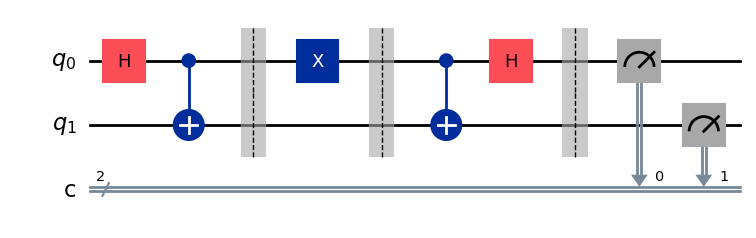

In [137]:
# Measurement - Bob measures both qubits to decode
qc.measure(qr, cr) # Measure q0 and q1, store in c0 and c1

# Circuit Visualization
print("\n--- Superdense Coding Circuit Diagram ---")
display(qc.draw(output='mpl')) # Display circuit diagram

## 6. Circuit Simulation and Results

Now, we simulate the quantum circuit using Qiskit's AerSimulator. We run the simulation for 1024 shots to get statistically meaningful results. After simulation, we plot a histogram of the measurement outcomes to visualize the results and determine the most probable outcome, which should correspond to the bits Alice encoded.

Execute the code cell below to run the simulation and display the histogram of measurement outcomes. The histogram will appear below the code cell.

In [138]:
# Circuit Simulation and Results
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024) # Increased shots for presentation
result = job.result()
counts = result.get_counts(qc)

print("\n--- Measurement Outcome Histogram ---")
plot_histogram(counts, title="Superdense Coding Measurement Outcomes")
plt.show() # Show histogram plot

received_bits_probable = max(counts, key=counts.get) # Most probable outcome
print(f"\nReceived bits (Bob - most probable outcome): {received_bits_probable}") # Display received bits
if received_bits_probable == f"{bit2}{bit1}": # Check if decoded correctly
    print("\nSuperdense Coding Successful! Encoded bits match received bits (most probable outcome).")
else:
    print("\nSuperdense Coding May Not Be Fully Successful (most probable outcome may not match encoded bits). Check histogram for probabilities.")


--- Measurement Outcome Histogram ---

Received bits (Bob - most probable outcome): 10

Superdense Coding Successful! Encoded bits match received bits (most probable outcome).


## 7. Analyzing the Results

Examine the histogram of measurement outcomes. The labels on the histogram represent the measurement outcomes in the order `c1c0` (classical bit 1 then classical bit 0).  We are interested in the most probable outcome (the tallest bar in the histogram).

*   **If superdense coding is successful:** The most probable outcome should correspond to the classical bits that Alice encoded (`bit2` and `bit1`).  For example, if you encoded `bit2=1` and `bit1=0`, you should expect the most probable outcome to be `"10"` (c1c0).  The output `Received bits (Bob - most probable outcome): ...` and the "Superdense Coding Successful!" message below the histogram will confirm if the decoding was successful for the most probable outcome.
*   **Try changing the encoded bits:** Go back to step 3, change the values of `bit1` and `bit2` (e.g., try `bit1 = 1`, `bit2 = 0`, or `bit1 = 1`, `bit2 = 1`, or `bit1 = 0`, `bit2 = 0`), and re-run steps 3 through 6. Observe how the most probable outcome in the histogram changes to reflect the newly encoded bits.

**Congratulations!** You have simulated superdense coding using Qiskit. This lab demonstrates how entanglement can be used to transmit two classical bits of information using only one qubit, showcasing a quantum advantage in communication!

## CHSH Game Lab: Probing Quantum Non-Locality (Qiskit Aer Version - Reverted)

This Jupyter Notebook demonstrates the CHSH game (Clauser-Horne-Shimony-Holt game), a simplified version of Bell Tests.  By simulating this game, we will illustrate the violation of Bell's inequalities and showcase the advantage of quantum strategies over classical strategies, highlighting the concept of quantum non-locality.  **This version reverts to using `qiskit_aer` for simulation, as in the original lab.**

## 1. Setting up the Environment

First, we import the necessary libraries from Qiskit and NumPy. Execute the code cell below to import these libraries.

In [139]:
import numpy as np
from numpy import pi, random
import matplotlib.pyplot as plt
from collections import defaultdict

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import RYGate, HGate, CXGate

In [140]:
def chsh_game(strategy):
    # This function runs the CHSH game, using the strategy (a function
    # from two bits to two bits), returning 1 for a win and 0 for a loss.

    # Choose x and y randomly
    x, y = random.randint(0, 2), random.randint(0, 2)

    # Use the strategy to determine a and b
    a, b = strategy(x, y)

    # Decide if the strategy wins or loses
    if (a != b) == (x & y):
        return 1  # Win
    return 0  # Lose

## 2. Defining the Classical Strategy

This function defines the CHSH game's win/loss condition. It remains the same as in the original lab.

Execute the code cell below to define the `classical_strategy` function.

In [141]:
def classical_strategy(x, y):
    """
    A simple classical strategy where Alice and Bob always answer 0.
    Returns True if they win for given questions (x, y), False otherwise.
    """
    a = 0 # Alice always answers 0
    b = 0 # Bob always answers 0
    return (a ^ b) == (x & y) # Check win condition: x*y = a XOR b

## 3. Defining the Quantum Circuit for the CHSH Strategy

This function creates the QuantumCircuit for the CHSH game's quantum strategy. It remains the same from the previous version.

Execute the code cell below to define the `chsh_circuit` function.

In [142]:
def chsh_circuit(x, y):
    # This function creates a `QuantumCircuit` implementing the quantum
    # strategy described above (including the e-bit preparation).

    qc = QuantumCircuit(2, 2)

    # Prepare an e-bit
    qc.h(0)
    qc.cx(0, 1)
    qc.barrier()

    # Alice's actions
    if x == 0:
        qc.ry(0, 0)
    else:
        qc.ry(-pi / 2, 0)
    qc.measure(0, 0)

    # Bob's actions
    if y == 0:
        qc.ry(-pi / 4, 1)
    else:
        qc.ry(pi / 4, 1)
    qc.measure(1, 1)

    return qc

## 4. Defining the Quantum Strategy using Qiskit Aer Simulator

This section is modified to revert to using `qiskit_aer`'s `AerSimulator` for circuit execution, as in the original lab. The `quantum_strategy` function now directly uses `AerSimulator` instead of Qiskit Runtime Sampler.

Execute the code cell below to define the `quantum_strategy` function using AerSimulator.

In [143]:
def quantum_strategy(x, y):
    # This function runs the appropriate quantum circuit defined above
    # one time using Qiskit AerSimulator and returns the measurement results

    # Create the Quantum Circuit for the given questions
    qc = chsh_circuit(x, y)
    
    result = AerSimulator().run(qc, shots=1).result()
    statistics = result.get_counts() # Get counts directly from AerSimulator result

    # Determine the output bits and return them
    bits = list(statistics.keys())[0]
    a, b = bits[0], bits[1]
    return a, b

**Explanation of Changes in `quantum_strategy` (Reverted to AerSimulator):**

- **Qiskit Runtime Code Removed:**
    - The code lines related to initializing `QiskitRuntimeService`, selecting a backend, and initializing `Sampler` have been removed.

- **AerSimulator Execution Restored:**
    - The code now directly uses `AerSimulator().run(qc, shots=1).result()` to execute the `chsh_circuit`.
    - `statistics = result.get_counts()` is used to get the counts dictionary directly from the `AerSimulator` result, which is the standard way to get counts when using `qiskit_aer`.

- **Simplified Code:**
    - The code is now simpler and more directly resembles the original lab's approach, without the added complexity of Qiskit Runtime Primitives.


## 5. Defining the Classical Strategy

The classical strategy function remains unchanged.

Execute the code cell below to define the `classical_strategy` function.

In [144]:
def classical_strategy(x, y):
    # This function implements just one example of an optimal classical
    # strategy for the CHSH game. Other classical strategies can be
    # implemented by changing the bit values assigned to a and b.

    # Alice's answer
    if x == 0:
        a = 0
    elif x == 1:
        a = 1

    # Bob's answer
    if y == 0:
        b = 1
    elif y == 1:
        b = 0

    return a, b

## 6. Playing the CHSH Game with Quantum and Classical Strategies

The following code cells simulate the CHSH game for a number of rounds, both with the `quantum_strategy` (using Qiskit AerSimulator) and the `classical_strategy`. We then calculate the fraction of games won for each strategy.

Execute the code cell below to play the game with the quantum strategy.

In [145]:
NUM_GAMES = 1000
TOTAL_SCORE_QUANTUM = 0

for _ in range(NUM_GAMES):
    TOTAL_SCORE_QUANTUM += chsh_game(quantum_strategy)

print("Fraction of games won with Quantum Strategy (using AerSimulator):", TOTAL_SCORE_QUANTUM / NUM_GAMES)

Fraction of games won with Quantum Strategy (using AerSimulator): 0.849


Execute the code cell below to play the game with the classical strategy.

In [146]:
NUM_GAMES = 1000
TOTAL_SCORE_CLASSICAL = 0

for _ in range(NUM_GAMES):
    TOTAL_SCORE_CLASSICAL += chsh_game(classical_strategy)

print("Fraction of games won with Classical Strategy:", TOTAL_SCORE_CLASSICAL / NUM_GAMES)

Fraction of games won with Classical Strategy: 0.745


## 7. Analyzing the Results

Examine the output of the simulations.

*   **Fraction of games won with Quantum Strategy (using AerSimulator):** You should observe a win rate significantly higher than 75%, demonstrating the quantum advantage in the CHSH game.
*   **Fraction of games won with Classical Strategy:** This should be around 75%, representing the classical limit.

The results should clearly show that the quantum strategy outperforms the classical strategy, illustrating the power of quantum mechanics and entanglement in violating Bell inequalities, now simulated using `qiskit_aer` directly.

**Congratulations!** You have now implemented and simulated the CHSH game using `qiskit_aer`, replicating the simulation from the original lab and demonstrating the quantum advantage in the CHSH game.